In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

us_sales_data = pd.read_csv("US_Regional_Sales_Data.csv")


print(us_sales_data)


In [2]:
print(us_sales_data.head())

   OrderNumber Sales Channel WarehouseCode ProcuredDate OrderDate ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004     31/12/17   31/5/18  14/6/18   
1  SO - 000102        Online  WARE-NMK1003     31/12/17   31/5/18  22/6/18   
2  SO - 000103   Distributor  WARE-UHY1004     31/12/17   31/5/18  21/6/18   
3  SO - 000104     Wholesale  WARE-NMK1003     31/12/17   31/5/18   2/6/18   
4  SO - 000105   Distributor  WARE-NMK1003      10/4/18   31/5/18  16/6/18   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  _ProductID  \
0      19/6/18          USD             6           15       259          12   
1       2/7/18          USD            14           20       196          27   
2       1/7/18          USD            21           16       213          16   
3       7/6/18          USD            28           48       107          23   
4      26/6/18          USD            22           49       111          26   

   Order Quantity  Discount Applied Unit Cost Unit

In [3]:
columns = us_sales_data[["Discount Applied", "Unit Price", "Order Quantity"]]
print(columns.head())

   Discount Applied Unit Price  Order Quantity
0             0.075   1,963.10               5
1             0.075   3,939.60               3
2             0.050   1,775.50               1
3             0.075   2,324.90               8
4             0.100   1,822.40               8


us_sales_data['Order Quantity'] = us_sales_data['Order Quantity']
us_sales_data['Unit Price'] = pd.to_numeric(us_sales_data['Unit Price'], errors='coerce')
us_sales_data['Discount Applied'] = pd.to_numeric(us_sales_data['Discount Applied'], errors='coerce')

# Calculate total sales for each row
us_sales_data['Total Sales'] = us_sales_data['Order Quantity'] * us_sales_data['Unit Price'] * (1 - us_sales_data['Discount Applied'])



discount_sales = us_sales_data.groupby('Discount Applied')['Total Sales'].sum().reset_index()

In [19]:
print(discount_sales)

   Discount Applied  Total Sales
0             0.050  1309732.415
1             0.075   979576.850
2             0.100   741876.930
3             0.150   460828.010
4             0.200   280102.880
5             0.300   113202.530
6             0.400   105388.320


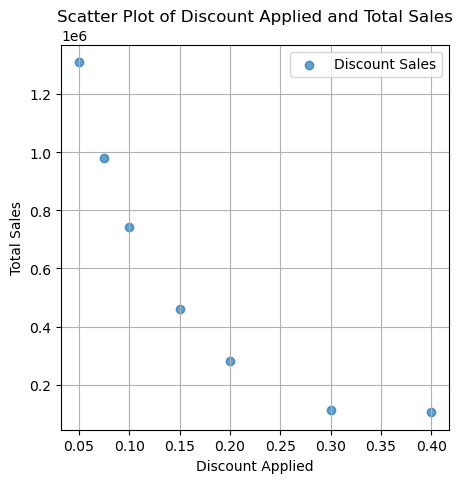

In [15]:
# Displaying the total sales for each discount level
plt.figure(figsize=(5,5))  
plt.scatter(discount_sales['Discount Applied'], discount_sales['Total Sales'], label='Discount Sales', alpha=0.7)

# Add labels and title
plt.xlabel('Discount Applied')
plt.ylabel('Total Sales')
plt.title('Scatter Plot of Discount Applied and Total Sales')
plt.legend()
plt.grid(True)
plt.show()

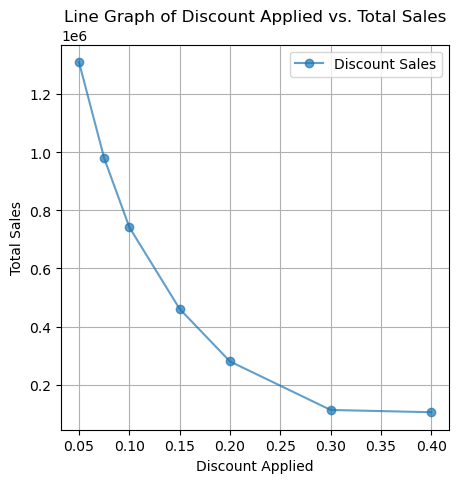

In [16]:
plt.figure(figsize=(5, 5))  

# Creating  a line graph
plt.plot(discount_sales['Discount Applied'], discount_sales['Total Sales'], marker='o', linestyle='-', label='Discount Sales', alpha=0.7)
plt.xlabel('Discount Applied')
plt.ylabel('Total Sales')
plt.title('Line Graph of Discount Applied vs. Total Sales')
plt.legend()
plt.grid(True)
plt.show()